Automatically reload (can sometimes go out of sync) and also import the twitterClient so we can call the API.

In [124]:
%load_ext autoreload
%autoreload 1
import twitterClient
import datetime

In [125]:
import tweepy
import pandas as pd

#connect to Twitter API using Tweepy Client and bearertoken
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAACw4ggEAAAAAX%2BPWHekXvrJY0ubMtDJ6mrbeLvE%3DDwlTPCWi2iPZSLesl2utvZueEhCfbbBQyBgVLg7g6NELE30htJ')
#query to find all tweets with KSI in it and in English
query = "KSI -is:retweet lang:en"
#List of fields we want to retrieve from the API
fields = ['author_id','id','in_reply_to_user_id','text','lang','entities']
#Header fields for the dataframe
KSI_df_headers = ['author_id','id','in_reply_to_user_id','text','lang','entities']
#Creating an empty dataframe with column headers
KSI_df = pd.DataFrame(columns=KSI_df_headers)
#Empty dictionary to append results
KSI_dict = []
#Using Paginator to fetch more than 100 tweets (15000) with KSI in them
for tweet in tweepy.Paginator(client.search_recent_tweets, query=query,max_results=100, end_time="2022-09-01T11:59:59Z",start_time="2022-08-26T17:59:13Z", tweet_fields=fields).flatten(limit = 15000):
    KSI_dict.append({'author_id':tweet.author_id,'id':tweet.id,'in_reply_to_user_id':tweet.in_reply_to_user_id,'text':tweet.text,'lang':tweet.lang, 'entities':tweet.entities})
#Appending obtained results to dataframe
KSI_df = KSI_df.append(KSI_dict)

C:\Users\nates\AppData\Local\Temp\ipykernel_9836\1340877515.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  KSI_df = KSI_df.append(KSI_dict)


In [126]:
#Saving all the tweets received to a variable
KSI_tweets = KSI_df['text']
#KSI_df.boxplot['text']
KSI_df['tweet_length'] = KSI_df['text'].str.len()

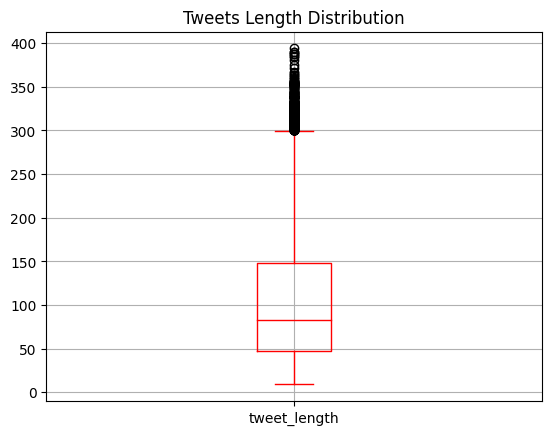

In [127]:
from textwrap import fill
from turtle import color, title
from matplotlib import pyplot as plt
stud_bplt = KSI_df.boxplot(column = 'tweet_length', color = "red")
stud_bplt.plot()
plt.title('Tweets Length Distribution')
plt.show()

In [128]:
 # Perform tokenisation, normalisation (lower case and stemming) and stopword and twitter keyword removal.
def processTweet(text, tokenizer, stemmer, stopwords):
    """

    @param text: tweet text
    @param tokenizer: tokeniser used.
    @param stemmer: stemmer used.
    @param stopwords: list of stopwords used

    @returns: a list of processed tokens
    """

    # covert all to lower case
    text = text.lower()
    # tokenise
    lTokens = tokenizer.tokenize(text)
    # strip whitespaces before and after
    lTokens = [token.strip() for token in lTokens]
    # stem (we use set to remove duplicates)
    lStemmedTokens = set([stemmer.stem(tok) for tok in lTokens])



    # remove stopwords, digits
    return [tok for tok in lStemmedTokens if tok not in stopwords and not tok.isdigit()]

In [129]:
#Implementing tokenization, stop-word removal, punctuation removal and calculating frequency of words in tweets
import sys
import json
import string
from collections import Counter
import nltk
nltk.download('stopwords')


# number of most frequent terms to display
freqNum = 50

# tweet tokeniser to use
tweetTokeniser = nltk.tokenize.TweetTokenizer()
# use the punctuation symbols defined in string.punctuation
lPunct = list(string.punctuation)
# use stopwords from nltk and a few other twitter specific terms like 'rt' (retweet)
lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['rt', 'via','KSI','@KSI','@ksi','ksi','’','hi','say','bro','wa','thi','would','get']
# we use the popular Porter stemmer
tweetStemmer = nltk.stem.PorterStemmer()

# our term frequency counter
termFreqCounter = Counter()
for tweet in KSI_df['text']:
    # tokenise, filter stopwords and get convert to lower case
    lTokens = processTweet(text=tweet, tokenizer=tweetTokeniser, stemmer=tweetStemmer, stopwords=lStopwords)

    # update count
    termFreqCounter.update(lTokens)
all_term = []
total_count = []
# print out most common terms
for term, count in termFreqCounter.most_common(freqNum):
    all_term.append(term)
    total_count.append(count)
    print(term + ': ' + str(count))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nates\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


fight: 1956
@loganpaul: 1745
jake: 1357
@primehydr: 1201
@jakepaul: 1097
like: 1093
😂: 837
box: 804
one: 723
beat: 660
paul: 654
better: 628
ha: 626
make: 596
logan: 590
think: 586
tate: 564
even: 564
boxer: 558
know: 536
prime: 531
@keemstar: 523
u: 523
vs: 513
@misfitsbox: 487
peopl: 482
guy: 475
good: 474
go: 471
see: 470
want: 452
@ksinews_: 452
time: 451
whi: 447
got: 447
shit: 441
said: 437
pro: 437
man: 401
still: 399
fan: 398
becaus: 390
@ytboxrec: 388
look: 381
andrew: 380
ratio: 374
jj: 372
year: 367
need: 363
fuck: 361


Text(0.5, 1.0, 'Top 50 words with highest frequency')

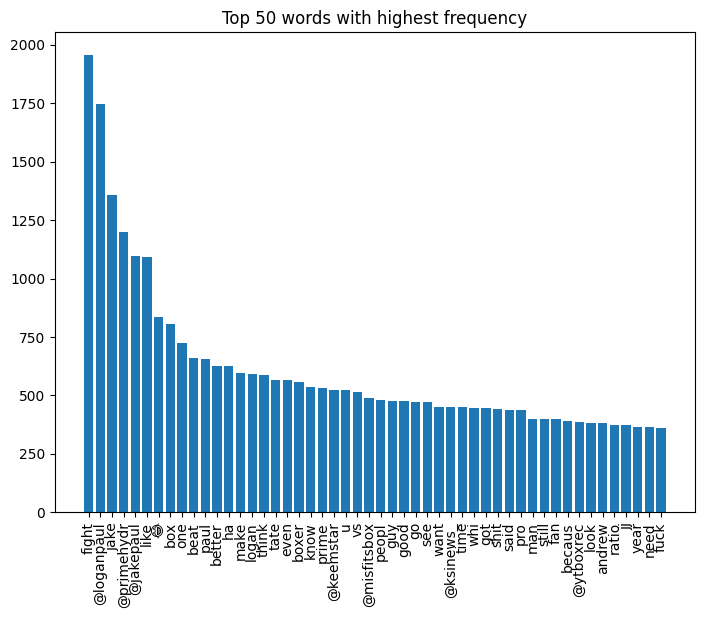

In [130]:
#Creating bar plot to show frequency of words in the tweets
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y_pos = range(len(total_count))
plt.bar(y_pos, total_count)
# Rotation of the bars names
plt.xticks(y_pos, all_term, rotation=90)
plt.title('Top 50 words with highest frequency')

In [131]:
#Finding frequency of hashtags in tweets
import re
import collections
hashtags = []
for text in KSI_df['text']:
    if len(re.findall(r"#(\w+)", text)) > 0:
        #Using regular expressions to extract hashtags
        hashtags.append(re.findall(r"#(\w+)", text))
hashtags = [item for sublist in hashtags for item in sublist]
#print(hashtags)
counter = collections.Counter(hashtags)
hashtags_term = []
hashtags_count = []
for tag, count in counter.most_common(20):
    hashtags_term.append(tag)
    hashtags_count.append(count)
    
print(hashtags_term)

['LUNC', 'KSI', 'LUNATICSTOKEN', 'LUNAT', 'BURN', 'cz_binance', 'ksi', 'boxing', 'SportsCenter', 'loganpaul', 'Prime', 'KSI2Fights1Night', 'SilverDeadline', 'KSISwarmz', 'AndrewTate', 'JakePaul', 'BSC', 'prime', 'Boxing', 'NFT']


Text(0.5, 1.0, 'Top 20 hashtags with highest frequency')

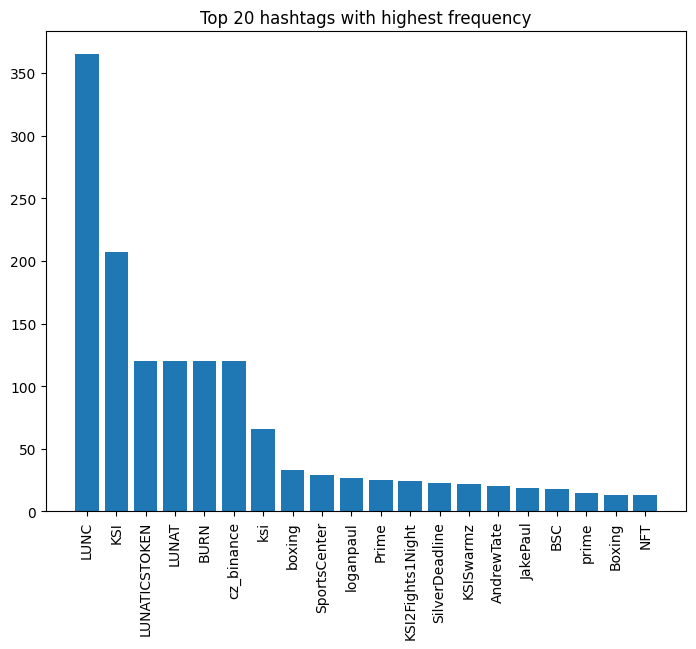

In [132]:
#Creating bar plot to show frequency of words in the tweets
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y_pos = range(len(hashtags_count))
plt.bar(y_pos, hashtags_count)
# Rotation of the bars names
plt.xticks(y_pos, hashtags_term, rotation=90)
plt.title('Top 20 hashtags with highest frequency')

# Data Preprocessing

In [133]:
#Convert tweets to lower case - Case Folding
KSI_df['text'] = KSI_df['text'].str.lower()


## Remove digits, URL's, Emojis, twitter hashtags and handles

In [134]:
KSI_df['text'] = KSI_df['text'].str.replace('\d+', '')
KSI_df['text'] = KSI_df['text'].replace(to_replace=r'^https?:\/\/.*[\r\n]*',value='',regex=True)
#KSI_df['text'] = KSI_df['text'].str.replace('[^A-Za-z0-9]', '', flags=re.UNICODE)
KSI_df['text'] = KSI_df['text'].str.replace(r'\s*@\w+', '', regex=True)

C:\Users\nates\AppData\Local\Temp\ipykernel_9836\3523906141.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  KSI_df['text'] = KSI_df['text'].str.replace('\d+', '')


## Tokenization, Stop-words, punctuation removal and stemming

In [137]:
#Tokenize - split into words
import sys
import json
import string
from collections import Counter
import nltk
nltk.download('stopwords')


# number of most frequent terms to display
freqNum = 50

# tweet tokeniser to use
tweetTokeniser = nltk.tokenize.TweetTokenizer()
# use the punctuation symbols defined in string.punctuation
lPunct = list(string.punctuation)
# use stopwords from nltk and a few other twitter specific terms like 'rt' (retweet)
lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['rt', 'via','KSI','@KSI','@ksi','ksi','’','hi','say','bro','wa','thi','would','get']
# we use the popular Porter stemmer
tweetStemmer = nltk.stem.PorterStemmer()
tokens = []
for tweet in KSI_df['text']:
    # tokenise, filter stopwords and get convert to lower case
    tokens.append(processTweet(text=tweet, tokenizer=tweetTokeniser, stemmer=tweetStemmer, stopwords=lStopwords))

KSI_df['tokenized'] = tokens


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nates\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [157]:
#Count of words in tweet and tokenized columns
KSI_df['text_count'] = KSI_df['text'].str.count(' ')
KSI_df['token_count'] = KSI_df['tokenized'].apply(str).str.count(' ')+1

In [160]:
Total_text = KSI_df['text_count'].sum()
Total_token = KSI_df['token_count'].sum()
print(Total_text)
print(Total_token)

224936
119890


# Sentimental Analysis

In [175]:
#Clean Tweets

def cleanTweet(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions
    text = re.sub(r'#','',text) # Removing '#'
    text = re.sub(r'rt[\s]+','',text) #remove rt
    text = re.sub(r'https?:\/\/\S+','',text) #remove hyperlinks
    
    return text

KSI_df['text'] = KSI_df['text'].apply(cleanTweet)

In [173]:
#Basic sentiment analysis.  Count the number of positive words, count the negative words, overall polarity is the 
# difference in the two numbers.
from textblob import TextBlob
#Function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
KSI_df['Subjectivity'] = KSI_df['text'].apply(getSubjectivity)
KSI_df['Polarity'] = KSI_df['text'].apply(getPolarity)

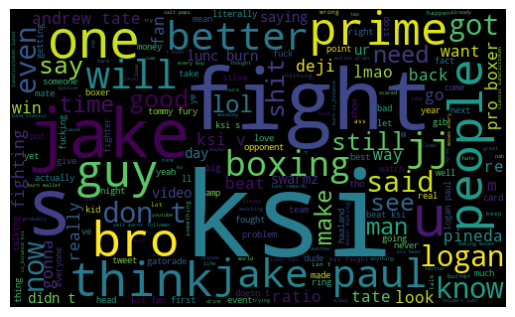

In [177]:
#Plotting Word Cloud
from wordcloud import WordCloud
allWords = ' '.join( [ twts for twts in KSI_df['text']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [178]:
#Function to compute negetive, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

KSI_df['Analysis'] = KSI_df['Polarity'].apply(getAnalysis)

In [179]:
#Print all positive tweets
j=1
sortedDF = KSI_df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j)+ ') ' +sortedDF['text'][i])
        print()
        j=j+1

1)  yeah you could watch the ksi fight at select odeons and pretty much all vues, it was £ a ticket to watch it at vue local to me

2)  lol gullible.your pfp reminds me of this guy who used to do fortnite fashion shows on youtube under the name of ‘lightsaberdk’ a few years back 😳

3) especially ksi to be honest

4)  that there was a violation, 😂😂😂 is absolutely right. mate now that you ratio'ed jake  he's gonna block you,😂😂😂😂😂

5)  if it’s not ksi no one wants to hear it m

6)  he plays for city so no shit

7) i’ve openly said i don’t really like or find andrew tate entertaining but i find it ironic that people like logan paul n ksi are the spokespeople for cancelling someone 

these two are deffo the wrong people to be spreading any message like this 

8)  a very noble person

9)  dats crazy😂😂 bro ksi is just more popular he’s too good, like bruh jake and his team had a major head statoo bro like god dam😂😂😂😂

10)  i don't really like sneako either but he was public about this for a l

In [180]:
#Print all Negative tweets
j=1
sortedDF = KSI_df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j)+ ') ' +sortedDF['text'][i])
        print()
        j=j+1

1)  mad how you still promote prn for kids though

2) yo for the jake fight next year, yall should do a team ksi vs. team jake paul.  and have influencers each of you to select to fight the other team on the undercard? 🤔

3) this is sneako reaction when his girl fuck another guy and he watches 🤣🤣🤣 

4)  hey brightclips try out the recent game rumbleverse, king of brawlers 

5)  you still manage to fuck up “your” and “you’re” in a response to someone that’s saying someone else is fucking that shit up you iq  brainlet. go to school, you need it kid.

6)  funny how a shoedited video can put out a false narrative about someone. 👀

7)  in that sense he’s wrong not in the moral sense but women can do damage with a machete

8)  that’s meaningless in real life

9)  ooh yeah, my bad, i didnt see the last bit of the clip 😅 well so he tried some stuff, and it wasnt for him...

10)  your late.

11)  and in fact, myself and lots of people i know haven't had a bottle or glass of water in literal yea

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

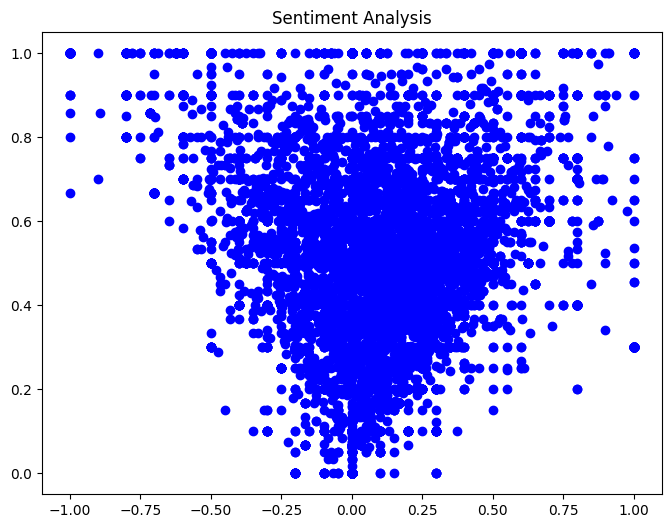

In [182]:
#Plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, KSI_df.shape[0]):
    plt.scatter(KSI_df['Polarity'][i], KSI_df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [183]:
#Get Percentage of positive tweets
ptweets = KSI_df[KSI_df.Analysis == 'Positive']
ptweets = ptweets['text']

round((ptweets.shape[0] / KSI_df.shape[0])*100, 1)


36.9

In [184]:
#Get Percentage of negative tweets
ptweets = KSI_df[KSI_df.Analysis == 'Negative']
ptweets = ptweets['text']

round((ptweets.shape[0] / KSI_df.shape[0])*100, 1)


17.3

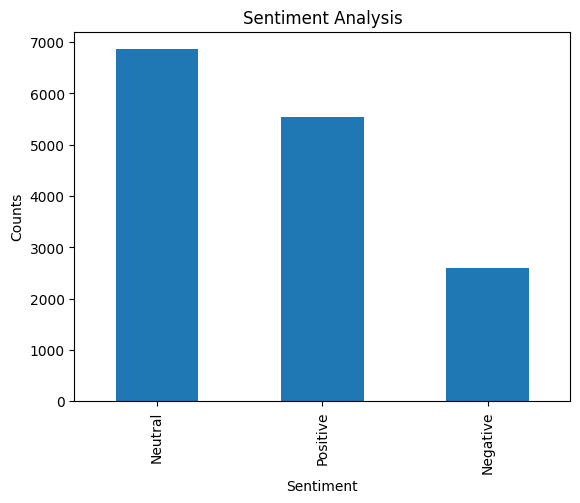

In [186]:
#Show the value counts
KSI_df['Analysis'].value_counts()

#plot and visualize
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
KSI_df['Analysis'].value_counts().plot(kind='bar')
plt.show()

# VADER Sentiment Analysis

In [188]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentimentVader(text):
    over_all_polarity = sid.polarity_scores(text)
    if over_all_polarity['compound'] >= 0.05:
        return 'Positive'
    elif over_all_polarity['compound'] <= 0.05:
        return 'Negative'
    else:
        return 'Neutral'

sid = SentimentIntensityAnalyzer()

KSI_df['sentiment_vader'] = KSI_df['text'].apply(lambda x: sentimentVader(x))

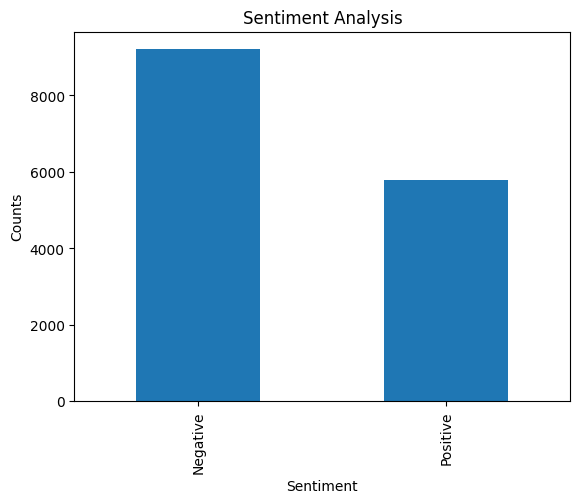

In [189]:
#Show the value counts
KSI_df['sentiment_vader'].value_counts()

#plot and visualize
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
KSI_df['sentiment_vader'].value_counts().plot(kind='bar')
plt.show()

In [191]:
'''
#TimeSeries vizualization

# we are using pandas for this, but first we need to get it into a pandas data frame structure
series = pd.DataFrame(KSI_df['sentiment_vader'], columns=['date', 'sentiment'])
# tell pandas that the date column is the one we use for indexing (or x-axis)
series.set_index('date', inplace=True)
# pandas makes a guess at the type of the columns, but to make sure it doesn't get it wrong, we set the sentiment
# column to floats
series[['sentiment']] = series[['sentiment']].apply(pd.to_numeric)
newSeries = series.resample('1D').sum()
# this plots and shows the time series
newSeries.plot()
plt.show()
'''

"\n#TimeSeries vizualization\n\n# we are using pandas for this, but first we need to get it into a pandas data frame structure\nseries = pd.DataFrame(KSI_df['sentiment_vader'], columns=['date', 'sentiment'])\n# tell pandas that the date column is the one we use for indexing (or x-axis)\nseries.set_index('date', inplace=True)\n# pandas makes a guess at the type of the columns, but to make sure it doesn't get it wrong, we set the sentiment\n# column to floats\nseries[['sentiment']] = series[['sentiment']].apply(pd.to_numeric)\nnewSeries = series.resample('1D').sum()\n# this plots and shows the time series\nnewSeries.plot()\nplt.show()\n"

# Topic Modeling (LDA)

In [212]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

def create_dictionary(words):
    return corpora.Dictionary(words)
#passing the dataframe column having tokens as the argument
id2word=create_dictionary(KSI_df.tokenized)
print(id2word)

Dictionary<12013 unique tokens: ['decid', 'demon', 'fight', 'instead', 'guy']...>


In [213]:
#Creating document matrix
def create_document_matrix(tokens,id2word):
    corpus = []
    for text in tokens:
       corpus.append(id2word.doc2bow(text))
    return corpus
#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(KSI_df.tokenized,id2word)
print(KSI_df.tokenized[0])
print(corpus[0])

['instead', 'decid', 'fight', 'demon']
[(0, 1), (1, 1), (2, 1), (3, 1)]


In [214]:
#Implementing LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
 id2word=id2word,
 num_topics=10,
 random_state=100,
 )

In [222]:
#Generating LDA Topics
def get_lda_topics(model, num_topics, top_n_words):
     word_dict = {}
     for i in range(num_topics):
         word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in model.show_topic(i, topn = top_n_words)];
 
     return pd.DataFrame(word_dict)
LDA_Model = get_lda_topics(lda_model,10,200)

In [236]:
LDA_Model

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,fight,fight,make,like,#ksi,jake,😂,fight,it',tate
1,almost,box,🔥,think,good,fight,prime,jake,thank,andrew
2,like,jake,u,go,burner,pineda,ratio,beat,song,logan
3,becaus,boxer,holder,dick,one,oppon,💀,silva,bryce,shit
4,#sportscent,better,buy,guy,wallet,swarmz,fan,vs,hand,paul
...,...,...,...,...,...,...,...,...,...,...
195,token,definit,link,photo,dumb,discredit,master,becaus,gon,learn
196,full,tweet,dumb,hypocrit,expos,prove,box,imagin,favourit,yeah
197,straight,–,good,understand,awesom,strong,calm,common,differ,concept
198,team,list,tell,grow,follow,gotten,thing,extrem,mo,display


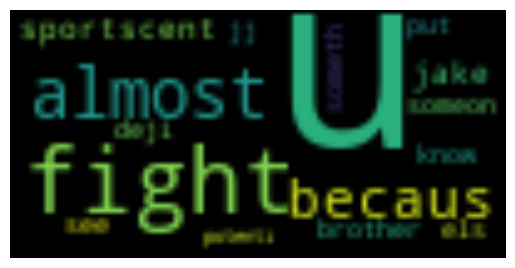

In [228]:
#Plotting Word Cloud for Topic 1
from wordcloud import WordCloud
allWords = ' '.join( [ twts for twts in LDA_Model['Topic # 01']])
wordCloud = WordCloud(width = 100, height = 50, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

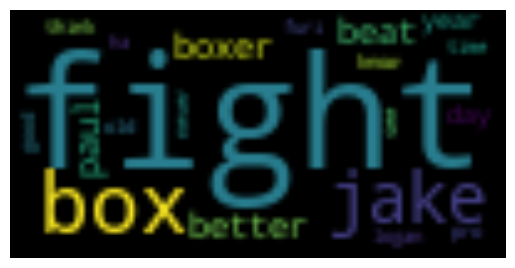

In [229]:
#Plotting Word Cloud for Topic 2
from wordcloud import WordCloud
allWords = ' '.join( [ twts for twts in LDA_Model['Topic # 02']])
wordCloud = WordCloud(width = 100, height = 50, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

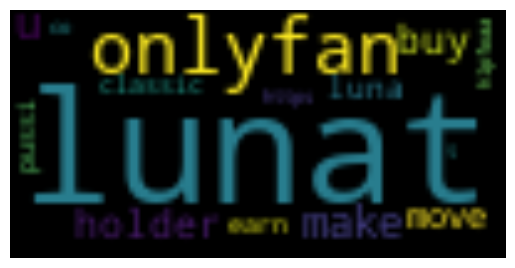

In [230]:
#Plotting Word Cloud for Topic 3
from wordcloud import WordCloud
allWords = ' '.join( [ twts for twts in LDA_Model['Topic # 03']])
wordCloud = WordCloud(width = 100, height = 50, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

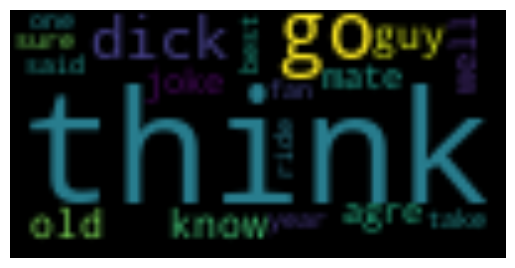

In [231]:
#Plotting Word Cloud for Topic 4
from wordcloud import WordCloud
allWords = ' '.join( [ twts for twts in LDA_Model['Topic # 04']])
wordCloud = WordCloud(width = 100, height = 50, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

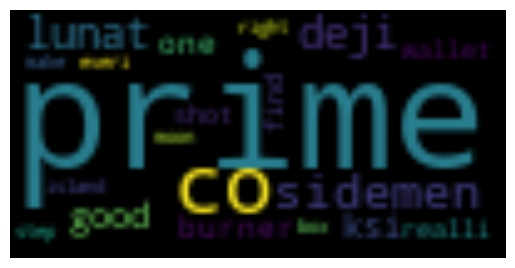

In [232]:
#Plotting Word Cloud for Topic 5
from wordcloud import WordCloud
allWords = ' '.join( [ twts for twts in LDA_Model['Topic # 05']])
wordCloud = WordCloud(width = 100, height = 50, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

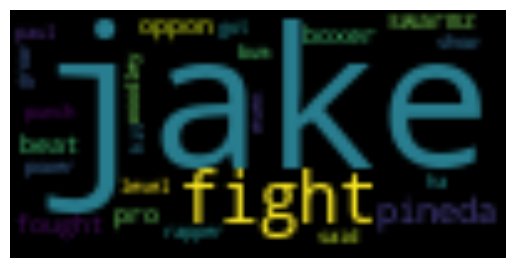

In [233]:
#Plotting Word Cloud for Topic 6
from wordcloud import WordCloud
allWords = ' '.join( [ twts for twts in LDA_Model['Topic # 06']])
wordCloud = WordCloud(width = 100, height = 50, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

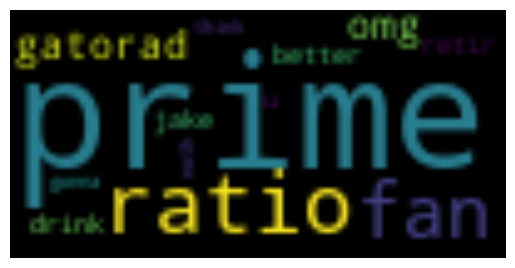

In [234]:
#Plotting Word Cloud for Topic 7
from wordcloud import WordCloud
allWords = ' '.join( [ twts for twts in LDA_Model['Topic # 07']])
wordCloud = WordCloud(width = 100, height = 50, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

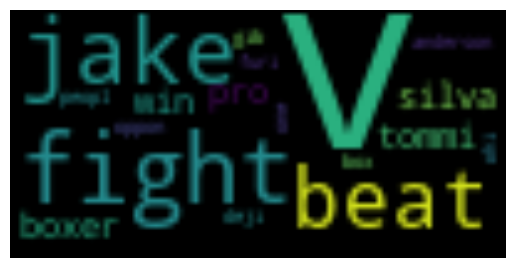

In [235]:
#Plotting Word Cloud for Topic 8
from wordcloud import WordCloud
allWords = ' '.join( [ twts for twts in LDA_Model['Topic # 08']])
wordCloud = WordCloud(width = 100, height = 50, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

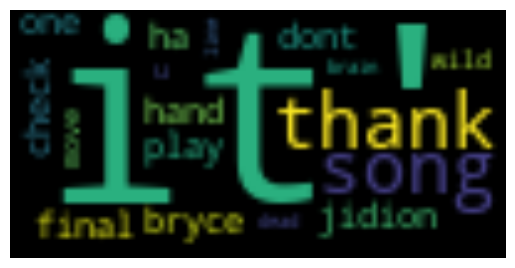

In [237]:
#Plotting Word Cloud for Topic 9
from wordcloud import WordCloud
allWords = ' '.join( [ twts for twts in LDA_Model['Topic # 09']])
wordCloud = WordCloud(width = 100, height = 50, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

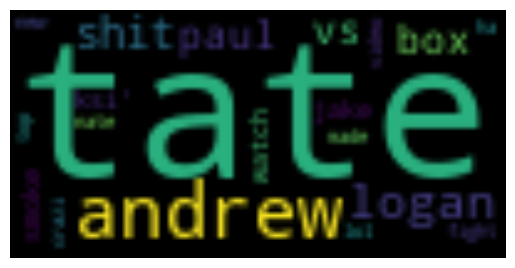

In [238]:
#Plotting Word Cloud for Topic 10
from wordcloud import WordCloud
allWords = ' '.join( [ twts for twts in LDA_Model['Topic # 10']])
wordCloud = WordCloud(width = 100, height = 50, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()